## Generating Contact Maps from the Categorical Jacobian of the Protein Language Model ESM-2

In [ ]:
#1. set up ESM-2 protein language model 
#2. process input data (FASTA files)
#3. calculate the categorical jacobian for each protein sequence
#4. from the categorical jacobian, produce contact maps for each resulting protein

In [2]:
%run utils.ipynb

In [3]:
#1. Set up ESM-2 Protein Language Model

In [4]:
# Source: https://github.com/facebookresearch/esm/tree/main?tab=readme-ov-file#esmfold
model, alphabet = torch.hub.load("facebookresearch/esm:main", "esm2_t33_650M_UR50D")

Using cache found in C:\Users\aguba/.cache\torch\hub\facebookresearch_esm_main


In [5]:
batch_converter = alphabet.get_batch_converter()
# model.eval() 

In [6]:
#2. Process input data (FASTA files)

In [7]:
folder_path = "protein_sequences"
data,lengths = process_fasta_files(folder_path)

In [8]:
#3. Calculate the categorical jacobian for each protein sequence

In [9]:
cjs = {}
for i in range(0,1): #len(data) - only take the first
    protein = data[i]
    # ∂in/∂out
    x = batch_converter([protein])[-1] 
    ln = lengths[i] 
    cj = get_categorical_jacobian(x,ln,model)
    # add protein with its corresponding categorical jacobian to dict
    cjs[protein[0]]=cj

  5%|████                                                                              | 1/20 [01:48<34:14, 108.15s/it]

{'2M7D_1': array([[[[ 2.99833620e+00, -2.59584904e-01, -4.10341769e-02, ...,
          -4.35825586e-02, -9.32013988e-02,  2.33600140e-02],
         [ 1.65442005e-02, -2.89635658e-01, -1.80012301e-01, ...,
          -1.58948898e-02, -2.29794145e-01,  2.36455679e-01],
         [-1.28003836e-01,  3.52087021e-02,  1.62895896e-01, ...,
          -1.08759761e-01, -2.32932687e-01, -2.22707987e-02],
         ...,
         [ 2.73374021e-02, -1.19715989e-01,  1.14941955e-01, ...,
           5.53512573e-02, -1.00114346e-02,  2.42080688e-02],
         [ 2.67246962e-02, -1.35938525e-01,  3.14573646e-02, ...,
           2.21395493e-02,  3.28620672e-02,  1.28869295e-01],
         [ 1.40288532e-01, -1.65680647e-01, -1.03040636e-02, ...,
           5.68128824e-02,  2.10956335e-02,  8.12034607e-02]],

        [[-1.23907864e-01,  3.38385201e+00, -7.09689409e-02, ...,
          -6.16729259e-03,  3.08101177e-02, -9.10465717e-02],
         [-1.67735666e-02,  1.46623611e-01,  4.76814210e-02, ...,
          -

In [10]:
#4. from the categorical jacobian, produce contact maps for each resulting protein
import matplotlib.pyplot as plt

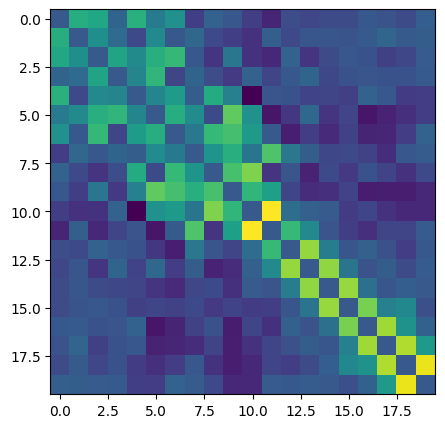

In [12]:
#Source: https://github.com/zzhangzzhang/pLMs-interpretability/blob/main/jac/01_jac_calculate_visualise.ipynb
plt.figure(figsize=(5,5))
plt.imshow(get_contacts(cjs["2M7D_1"]))
plt.show()

In [ ]:
# options for generating contact maps: mdtraj, biopython, own custom function close to how the model generates it (see code for the model if its open source)